<a href="https://colab.research.google.com/github/ManjuVijayakumar/ICTAK_DSA_FinalProject/blob/main/Crop_Yield_prediction_regression_task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# importing necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns
pd.set_option('display.max_columns', None)

pd.set_option('display.float_format', '{:.5f}'.format)

In [2]:
# Loading the dataset
file_url= 'https://raw.githubusercontent.com/ManjuVijayakumar/ICTAK_DSA_FinalProject/refs/heads/main/crop_yield_main.csv'
yield_df = pd.read_csv(file_url, index_col= 'Unnamed: 0')

# First 5 rows
yield_df.head()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2372.2,7024878.38,22882.34,0.796087,India,alluvial,22.54,22.19,27.55,16.67,16.84,15.53,27.16,26.37,21.93,25.28,26.78,21.11,23.88,20.55,26.02,23.13,16.19,18.2,40.7,91.8,131.9,241.8,569.9,511.2,315.5,366.8,36.4,12.6,35.4,58.9,465.6,1763.4,84.3
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2372.2,631643.29,2057.47,0.710435,India,alluvial,22.54,22.19,27.55,16.67,16.84,15.53,27.16,26.37,21.93,25.28,26.78,21.11,23.88,20.55,26.02,23.13,16.19,18.2,40.7,91.8,131.9,241.8,569.9,511.2,315.5,366.8,36.4,12.6,35.4,58.9,465.6,1763.4,84.3
2,Castor seed,1997,Kharif,Assam,796.0,22,2372.2,75755.32,246.76,0.238333,India,alluvial,22.54,22.19,27.55,16.67,16.84,15.53,27.16,26.37,21.93,25.28,26.78,21.11,23.88,20.55,26.02,23.13,16.19,18.2,40.7,91.8,131.9,241.8,569.9,511.2,315.5,366.8,36.4,12.6,35.4,58.9,465.6,1763.4,84.3
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2372.2,1870661.52,6093.36,5238.051739,India,alluvial,22.54,22.19,27.55,16.67,16.84,15.53,27.16,26.37,21.93,25.28,26.78,21.11,23.88,20.55,26.02,23.13,16.19,18.2,40.7,91.8,131.9,241.8,569.9,511.2,315.5,366.8,36.4,12.6,35.4,58.9,465.6,1763.4,84.3
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2372.2,165500.63,539.09,0.420909,India,alluvial,22.54,22.19,27.55,16.67,16.84,15.53,27.16,26.37,21.93,25.28,26.78,21.11,23.88,20.55,26.02,23.13,16.19,18.2,40.7,91.8,131.9,241.8,569.9,511.2,315.5,366.8,36.4,12.6,35.4,58.9,465.6,1763.4,84.3


In [3]:
# Last 5 rows
yield_df.tail()

,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Country,Soil_type,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
28735,Small millets,1998,Kharif,Nagaland,4000.0,2000,2225.4,395200.00,1160.00,0.500000,India,red,19.37,19.44,22.98,14.6,14.53,12.37,22.76,22.94,16.07,22.3,22.98,18.51,22.77,18.63,23.24,19.27,13.45,28.1,31.6,136.4,164.6,352.2,297.6,480.6,367.3,222.3,97.9,46.5,0.3,59.7,653.2,1367.9,144.7
28736,Wheat,1998,Rabi,Nagaland,1000.0,3000,2225.4,98800.00,290.00,3.000000,India,red,19.37,19.44,22.98,14.6,14.53,12.37,22.76,22.94,16.07,22.3,22.98,18.51,22.77,18.63,23.24,19.27,13.45,28.1,31.6,136.4,164.6,352.2,297.6,480.6,367.3,222.3,97.9,46.5,0.3,59.7,653.2,1367.9,144.7
28737,Maize,1997,Kharif,Jammu and Kashmir,310883.0,440900,1295.9,29586735.11,96373.73,1.285000,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.4,55.6,164.1,144.5,89.1,81.2,126.6,270.2,75.4,77.3,84.3,59.2,124.0,397.7,553.4,220.8
28738,Rice,1997,Kharif,Jammu and Kashmir,275746.0,5488,1295.9,26242746.82,85481.26,0.016667,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.4,55.6,164.1,144.5,89.1,81.2,126.6,270.2,75.4,77.3,84.3,59.2,124.0,397.7,553.4,220.8
28739,Wheat,1997,Rabi,Jammu and Kashmir,239344.0,392160,1295.9,22778368.48,74196.64,1.261818,India,alluvial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,68.4,55.6,164.1,144.5,89.1,81.2,126.6,270.2,75.4,77.3,84.3,59.2,124.0,397.7,553.4,220.8


## **Exploratory Data Analysis**

In [4]:
# Basic info
print('Dataset has {} rows and {} columns.'.format(yield_df.shape[0], yield_df.shape[1]))

Dataset has 28740 rows and 45 columns.


In [5]:
# Column names
yield_df.columns

Index(['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Production',
       'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield', 'Country',
       'Soil_type', 'Annual_mean_temp', 'Apr_temp', 'Aug_temp', 'Dec_temp',
       'Feb_temp', 'Jan_temp', 'Jul_temp', 'Jun_temp', 'Mar_temp', 'May_temp',
       'Monsoon_temp', 'Nov_temp', 'Oct_temp', 'Post_Monsoon_temp', 'Sep_temp',
       'Summer_temp', 'Winter_temp', 'JAN_rain', 'FEB_rain', 'MAR_rain',
       'APR_rain', 'MAY_rain', 'JUN_rain', 'JUL_rain', 'AUG_rain', 'SEP_rain',
       'OCT_rain', 'NOV_rain', 'DEC_rain', 'Jan-Feb_rain', 'Mar-May_rain',
       'Jun-Sep_rain', 'Oct-Dec_rain'],
      dtype='object')

In [16]:
yield_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28740 entries, 0 to 28739
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Crop               28740 non-null  object 
 1   Crop_Year          28740 non-null  int64  
 2   Season             28740 non-null  object 
 3   State              28740 non-null  object 
 4   Area               28740 non-null  float64
 5   Production         28740 non-null  int64  
 6   Annual_Rainfall    28740 non-null  float64
 7   Fertilizer         28740 non-null  float64
 8   Pesticide          28740 non-null  float64
 9   Yield              28740 non-null  float64
 10  Country            28740 non-null  object 
 11  Soil_type          28740 non-null  object 
 12  Annual_mean_temp   27712 non-null  float64
 13  Apr_temp           27712 non-null  float64
 14  Aug_temp           27712 non-null  float64
 15  Dec_temp           27712 non-null  float64
 16  Feb_temp           27712 no

In [9]:
# Summary Statistics
yield_df.describe()

,Crop_Year,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield,Annual_mean_temp,Apr_temp,Aug_temp,Dec_temp,Feb_temp,Jan_temp,Jul_temp,Jun_temp,Mar_temp,May_temp,Monsoon_temp,Nov_temp,Oct_temp,Post_Monsoon_temp,Sep_temp,Summer_temp,Winter_temp,JAN_rain,FEB_rain,MAR_rain,APR_rain,MAY_rain,JUN_rain,JUL_rain,AUG_rain,SEP_rain,OCT_rain,NOV_rain,DEC_rain,Jan-Feb_rain,Mar-May_rain,Jun-Sep_rain,Oct-Dec_rain
count,28740.00000,28740.00000,28740.00000,28740.00000,28740.00000,28740.00000,28740.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,27712.00000,25906.00000,25943.00000,25974.00000,25974.00000,25974.00000,25974.00000,25938.00000,25974.00000,25974.00000,25974.00000,25938.00000,25938.00000,25875.00000,25974.00000,25938.00000,25938.00000
mean,2008.65313,238328.14465,16463402.05926,1444.65962,31539757.89503,63580.24117,81.01764,25.06765,28.35981,26.65400,19.75136,21.45410,19.01790,27.03843,28.77368,25.18011,29.82457,27.26632,22.58789,25.56433,22.63453,26.59439,27.78828,20.23831,11.77363,16.91923,27.93589,50.10593,90.40126,248.63044,351.89080,296.73411,205.89786,99.56237,29.63060,11.13790,28.72033,168.44290,1103.89847,140.45773
std,6.37083,833845.96469,244882847.70761,860.14991,106622109.05454,240286.84964,885.50157,4.00299,4.96612,2.90663,5.01047,5.64108,5.67044,3.05188,3.95313,5.19626,4.76524,3.20526,4.32022,3.71506,4.22596,3.17546,4.83992,5.63406,24.99522,32.34988,41.60414,71.52708,105.48989,231.66573,281.13510,194.71758,123.91992,89.72986,54.21502,23.20292,50.96983,187.10721,739.26516,130.99053
min,1997.00000,0.50000,0.00000,274.70000,54.17000,0.09000,0.00000,3.83000,2.82000,10.42000,-2.90000,-3.33000,-4.81000,10.25000,9.88000,0.12000,6.89000,10.20000,0.45000,3.61000,0.60000,8.67000,3.70000,-3.88000,0.00000,0.00000,0.00000,0.00000,0.00000,4.00000,8.00000,10.60000,4.50000,0.00000,0.00000,0.00000,0.00000,0.00000,94.20000,0.10000
25%,2003.00000,2400.00000,2334.75000,847.80000,326562.01000,627.00000,0.57138,25.47000,28.75000,25.58000,17.77000,19.16000,16.35000,25.78000,26.74000,24.12000,29.45000,26.01000,21.87000,25.68000,22.06000,25.85000,28.08000,17.69000,0.50000,0.40000,1.50000,3.40000,12.60000,87.30000,159.80000,160.40000,113.70000,24.80000,1.20000,0.10000,2.50000,33.50000,595.20000,38.90000
50%,2009.00000,17224.00000,23591.00000,1149.60000,2262000.00000,4480.00000,1.00087,26.20000,30.07000,27.16000,20.57000,22.64000,19.67000,27.57000,29.83000,26.89000,31.16000,28.15000,23.71000,26.49000,23.80000,27.38000,29.45500,21.18000,3.00000,5.20000,10.50000,21.80000,47.00000,164.20000,283.40000,252.90000,187.10000,77.40000,8.80000,2.10000,12.90000,96.10000,889.80000,106.60000
75%,2014.00000,129373.00000,199621.00000,1816.40000,16723072.59000,33283.58000,2.27362,26.99000,31.05000,28.47000,23.17000,25.78000,23.57000,28.91000,31.39000,28.41000,33.08000,29.11000,25.00000,27.25000,24.97000,28.46000,30.38000,24.67000,13.60000,19.45000,35.20000,62.30000,124.40000,334.00000,430.00000,367.60000,269.00000,152.80000,32.00000,10.50000,34.30000,230.20000,1350.20000,199.80000
max,2020.00000,50808100.00000,6326000000.00000,5649.10000,4835406877.00000,15750511.00000,21105.00000,29.08000,33.02000,31.29000,26.91000,27.81000,26.78000,32.66000,35.13000,30.34000,34.79000,31.77000,27.86000,29.93000,27.74000,30.68000,32.21000,27.27000,296.00000,403.50000,341.40000,466.90000,610.90000,1153.00000,1778.90000,1146.00000,724.90000,567.90000,383.80000,219.90000,699.50000,1017.50000,3727.60000,823.30000


Missing value analysis

<Axes: >

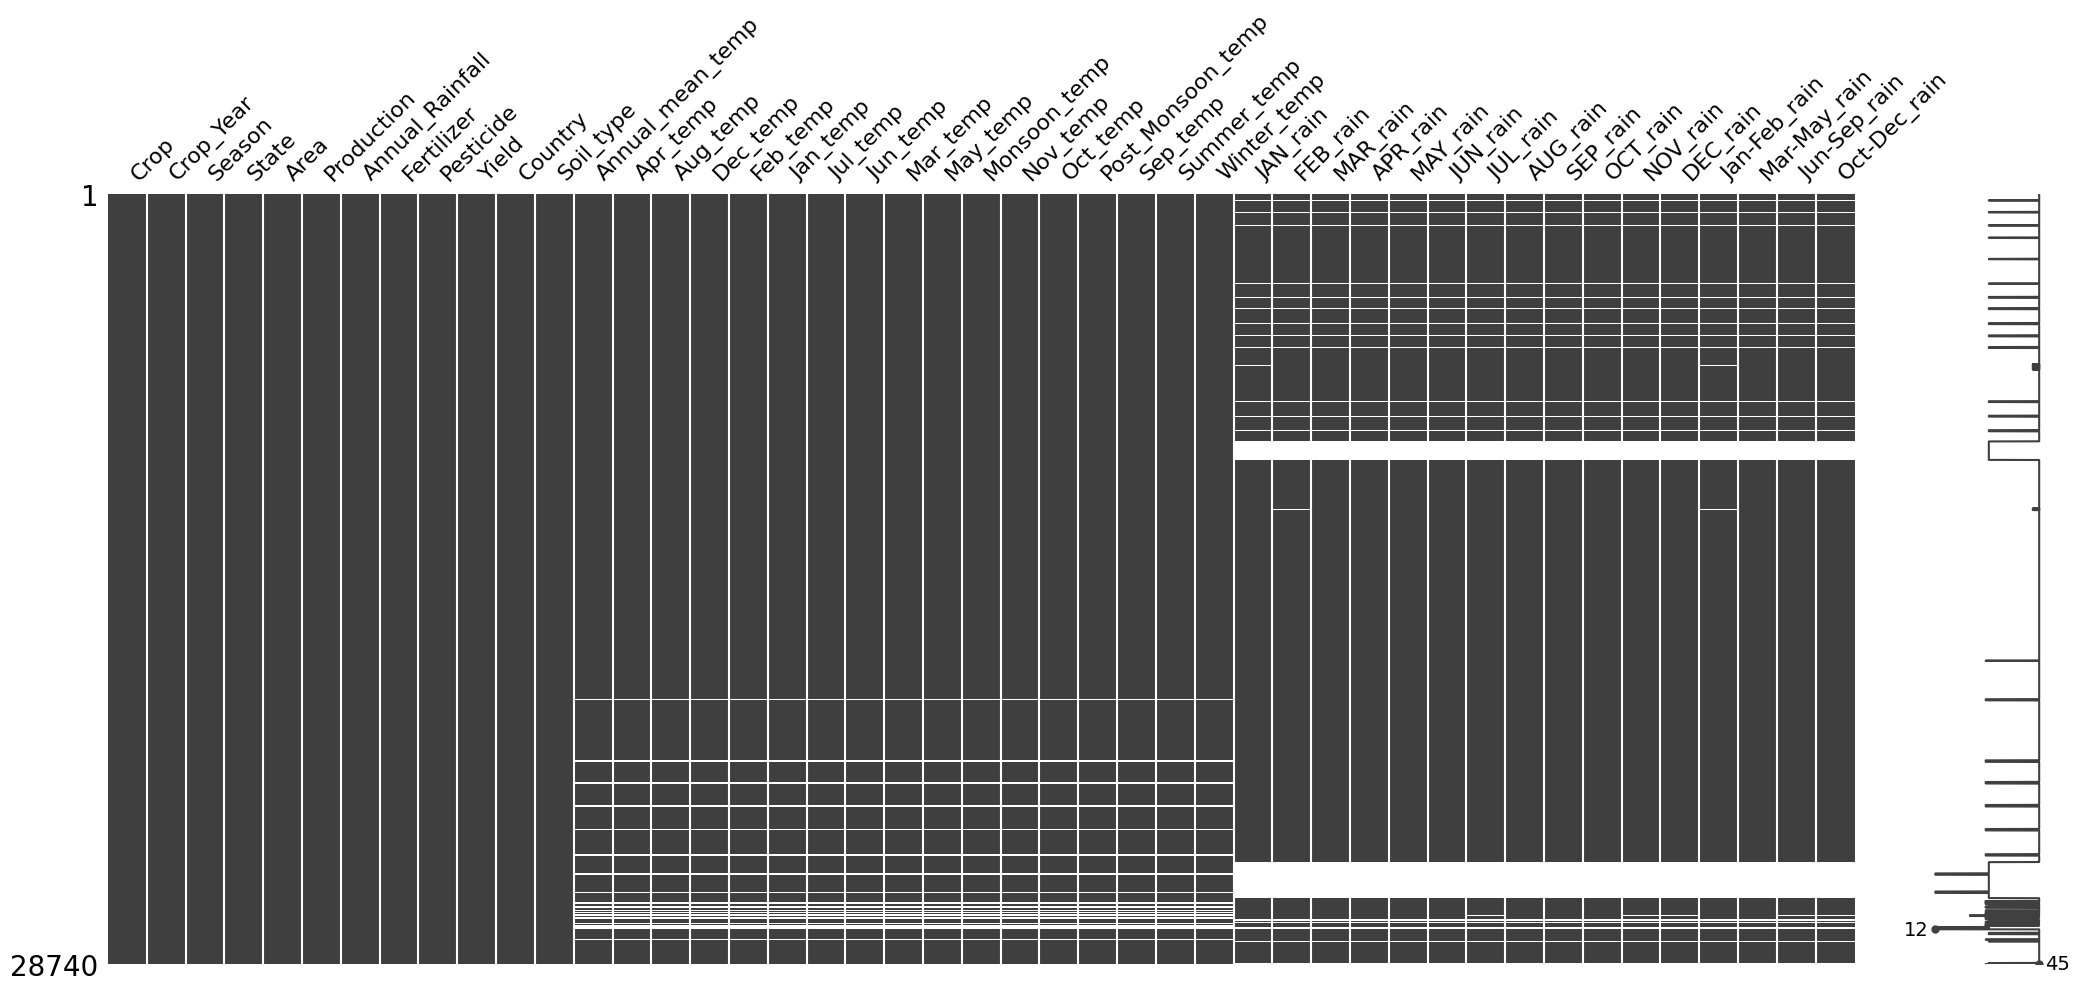

In [10]:
import missingno

missingno.matrix(yield_df)

In [14]:
# Calculate percentage of missing values per columns
missing_percent= (yield_df.isnull().sum() / len(yield_df)) * 100

# Combine with Counts
missing_data= pd.DataFrame(
    {
        'Missing Values' : yield_df.isnull().sum(),
        'Percentage (%)' : missing_percent
    }
).sort_values(by= 'Percentage (%)', ascending= False)

missing_data= missing_data[missing_data['Missing Values'] > 0]

print(missing_data)

                   Missing Values  Percentage (%)
Jan-Feb_rain                 2865         9.96868
JAN_rain                     2834         9.86082
JUL_rain                     2802         9.74948
Oct-Dec_rain                 2802         9.74948
Jun-Sep_rain                 2802         9.74948
DEC_rain                     2802         9.74948
NOV_rain                     2802         9.74948
FEB_rain                     2797         9.73208
APR_rain                     2766         9.62422
MAR_rain                     2766         9.62422
OCT_rain                     2766         9.62422
SEP_rain                     2766         9.62422
Mar-May_rain                 2766         9.62422
JUN_rain                     2766         9.62422
MAY_rain                     2766         9.62422
AUG_rain                     2766         9.62422
Winter_temp                  1028         3.57690
Oct_temp                     1028         3.57690
Summer_temp                  1028         3.57690


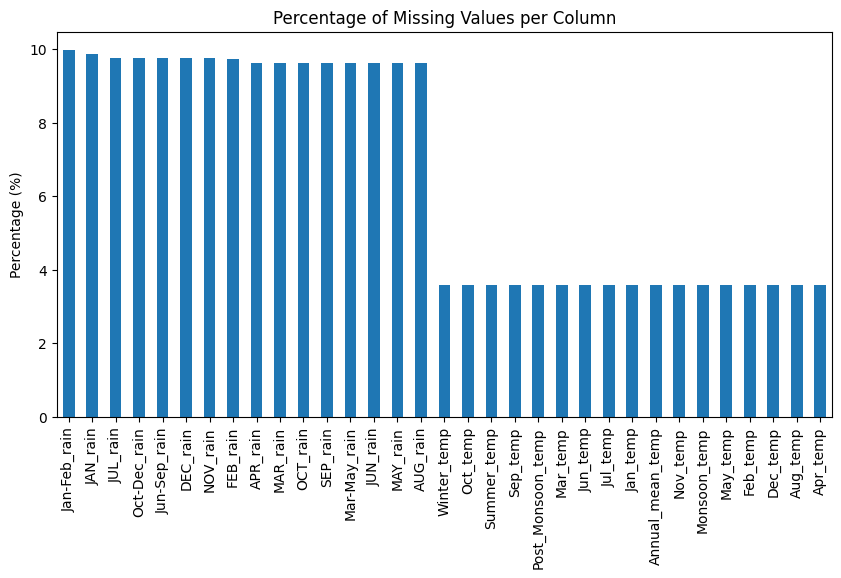

In [15]:
missing_data['Percentage (%)'].plot(kind='bar', figsize=(10,5))
plt.title('Percentage of Missing Values per Column')
plt.ylabel('Percentage (%)')
plt.show()

In [18]:
yield_df.Crop_Year.unique()

array([1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018,
       2019, 2020])